# Author: Süleyman Gölbol - 1801042656



In [21]:
import os
import re
import random
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [28]:
dataset_path = "datasets/UTK_Data/age_gender.csv"
# Read the dataset of age_gender
dataFrame = pd.read_csv(dataset_path)

In [66]:
def pixel_to_array_converter(pix_vals):
    pix_vals = re.findall(r'\S+', pix_vals)
    pix_vals = np.array(pix_vals, dtype='float32')
    pix_vals = pix_vals.reshape(48, 48)
    return pix_vals

    print(pix_vals)
    print(len(pix_vals))

# disable chained assignments
pd.options.mode.chained_assignment = None     

pix_vals = []
    
for i in range(len(dataFrame['pixels'])):
    # print(len(dataFrame['pixels']))
    pix_vals.append(pixel_to_array_converter(dataFrame['pixels'][i]))
    # Normalizing the data
    # pix_vals[i] = pix_vals[i] / 255.0
# Normalise images


In [68]:
# Shape
print(pix_vals[0].shape)
pix_vals = np.array(pix_vals)
pix_vals = pix_vals.reshape(pix_vals.shape[0], 48, 48, 1)
print(pix_vals.shape)

if np.max(pix_vals) > 1: 
    pix_vals = pix_vals/255

(48, 48)
(23705, 48, 48, 1)


<Figure size 600x400 with 0 Axes>

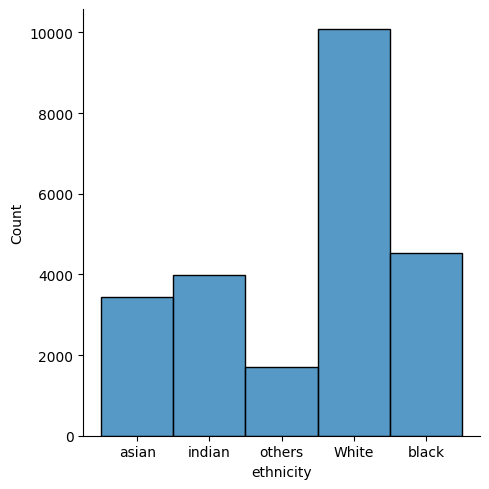

In [69]:
def draw_ethnicity_distributions():
    plt.figure(figsize=(6, 4))
    ethnic_frame = dataFrame['ethnicity']
    for i in range(len(ethnic_frame)):
        if ethnic_frame[i] == 0:
            ethnic_frame[i] = "White"
        elif ethnic_frame[i] == 1:
            ethnic_frame[i] = "black"
        elif ethnic_frame[i] == 2:
            ethnic_frame[i] = "asian"
        elif ethnic_frame[i] == 3:
            ethnic_frame[i] = "indian"    
        elif ethnic_frame[i] == 4:
            ethnic_frame[i] = "others" # arabs and hispanic people etc.
    
    seaborn.displot(ethnic_frame)
    plt.show()
draw_ethnicity_distributions()

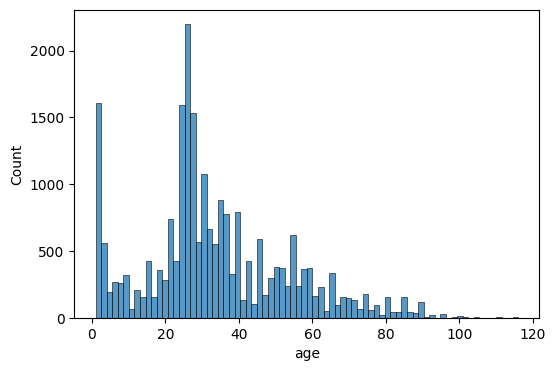

In [70]:
def draw_age_distributions():
    plt.figure(figsize=(6, 4))
    seaborn.histplot(dataFrame['age'])
    plt.show()
draw_age_distributions()

In [71]:
# Printing how many people are in each age group
for i in range(1, 100, 10):
    count_age = dataFrame[dataFrame["age"]==i]["age"].count()
    print("There are " + str(count_age)  + " labelled data for age " + str(i))

There are 1123 labelled data for age 1
There are 65 labelled data for age 11
There are 346 labelled data for age 21
There are 350 labelled data for age 31
There are 132 labelled data for age 41
There are 138 labelled data for age 51
There are 159 labelled data for age 61
There are 33 labelled data for age 71
There are 22 labelled data for age 81
There are 2 labelled data for age 91


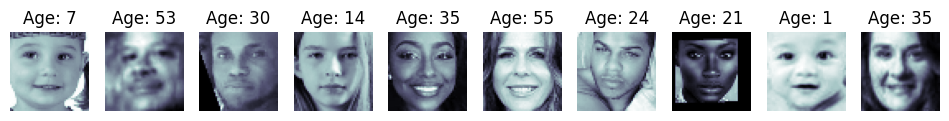

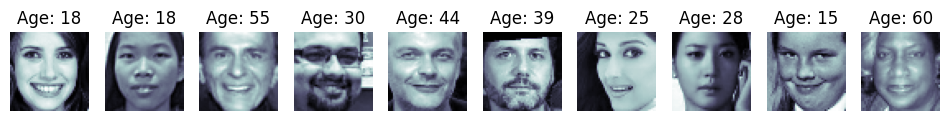

In [72]:
# Some images from the dataset
for i in range(0,2):
    random_image_ids = []
    for i in range(0,10):
        random_image_ids.append(random.randint(0, len(pix_vals)))
        
    figure, axes = plt.subplots(1, 10, figsize=(12, 5))
    for i in range(0, 10):
        age = dataFrame['age'][random_image_ids[i]]
        axes[i].set_title("Age: " + str(age))
        axes[i].imshow(pix_vals[random_image_ids[i]], cmap='bone') # gray or afmhot are also good
        axes[i].axis('off')

    plt.show()

In [40]:
# print(type(np.array(dataFrame['pixels'])))
# list_pixels = np.array(dataFrame['pixels'].tolist())
# print("list_pixels")
# print(type(list_pixels))

# # print(list_pixels)

# 2. PROCESSING

In [73]:
# def getTrainAndTestData(dataset):
#     ''' Split the data to train and test'''
#     # 90% of the dataset
#     train = dataset.sample(frac=0.9, random_state=100)
#     # 10% of the dataset
#     test = dataset.drop(train.index)
#     return train, test

# print(dataFrame['age'].values)

# # Split the data to train and test
# train, test = getTrainAndTestData(dataFrame)
# train_x = train['pixels']
# train_y = train['age']

# test_x = test['pixels']
# test_y = test['age']

# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)

[ 1  1  1 ... 99 99 99]
(21334,)
(21334,)
(2371,)
(2371,)


In [74]:
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [92]:
# X = dataFrame['pixels']
X = pix_vals
y = dataFrame['age'].values

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.22, random_state=42)

In [93]:
# Creating model
model = keras.Sequential()
# Adding layers to the model
print(pix_vals.shape[1:])

model.add(Conv2D(64, kernel_size=(3,3), input_shape=pix_vals.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])


# Callbacks for age model
callbacks = [tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             tf.keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1)]

model.summary()



(48, 48, 1)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 23, 23, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                         

In [94]:
history = model.fit(train_x, train_y, epochs=20, validation_data=(test_x, test_y), batch_size=64, callbacks=callbacks)

Epoch 1/20
289/289 [==============================] - 77s 264ms/step - loss: 218.1252 - mse: 218.1252 - val_loss: 2114.6790 - val_mse: 2114.6790 - lr: 0.0010
Epoch 2/20
289/289 [==============================] - 88s 304ms/step - loss: 138.5221 - mse: 138.5221 - val_loss: 792.9774 - val_mse: 792.9774 - lr: 0.0010
Epoch 3/20
289/289 [==============================] - 87s 302ms/step - loss: 118.4729 - mse: 118.4729 - val_loss: 98.8762 - val_mse: 98.8762 - lr: 0.0010
Epoch 4/20
289/289 [==============================] - 88s 305ms/step - loss: 110.0888 - mse: 110.0888 - val_loss: 142.4513 - val_mse: 142.4513 - lr: 0.0010
Epoch 5/20
289/289 [==============================] - ETA: 0s - loss: 105.1598 - mse: 105.1598
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
289/289 [==============================] - 90s 312ms/step - loss: 105.1598 - mse: 105.1598 - val_loss: 526.0798 - val_mse: 526.0798 - lr: 0.0010
Epoch 6/20
289/289 [==============================] - 89s 3

In [95]:
model.save('age_model_abhipsrajsahoo.h5')

<AxesSubplot:>

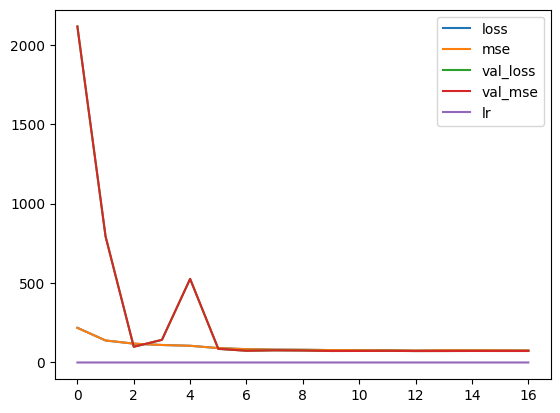

In [96]:
pd.DataFrame(history.history).plot()

In [97]:
valid_score = model.evaluate(test_x, test_y, verbose=1)

163/163 [==============================] - 6s 37ms/step - loss: 72.3771 - mse: 72.3771


In [99]:
prediction = model.predict(test_x)

[[26.762506 ]
 [42.045815 ]
 [ 5.3469944]
 ...
 [29.469843 ]
 [31.327675 ]
 [37.893097 ]]
